In [1]:
# Tutorial address:
# https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
print(check_output)

<function check_output at 0x10f05c598>


In [3]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')

(-0.5, 63.5, 63.5, -0.5)

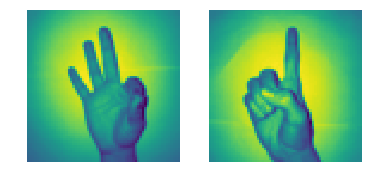

In [4]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[26].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [5]:
X = np.concatenate((x_l[204: 409], x_l[822:1027]), axis = 0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)
print(X.shape)
print(Y.shape)

(410, 64, 64)
(410, 1)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
print(X_train.shape[0])
print(X_test.shape[0])

348
62


In [7]:
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(348, 4096)
(62, 4096)


In [8]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_test = Y_test.T
y_train = Y_train.T
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 348)
(4096, 62)
(1, 348)
(1, 62)


In [9]:
def initiate_weight_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0
    return w, b

In [10]:
w, b = initiate_weight_and_bias(4096)
w.shape

(4096, 1)

In [11]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [12]:
y_head= sigmoid(0)
y_head

0.5

In [13]:
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    derivative_weight = np.dot(x_train, (y_head - y_train).T)/x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients
    

In [14]:
%matplotlib notebook
def update_learning_parameters(w, b, x_train, y_train, learning_rate, number_of_iteration):
    
    cost_list = []
    cost_list_2 = []
    index = []
    
    
    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # update w and b
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        
        if i%10 == 0:
            cost_list_2.append(cost)
            index.append(i)
    parameters = {'weight': w, 'bias': b}
    plt.plot(index, cost_list_2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.show()
    
    
    return parameters, gradients, cost_list
        
        

In [15]:
def predict(w, b, x_test):
    
    z = np.dot(w.T, x_test) + b
    y = sigmoid(z)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(y.shape[1]):
        if y[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_of_iteration):
    dimension = x_train.shape[0]
    w, b = initiate_weight_and_bias(dimension)
    
    parameter, gradients, cost_list = update_learning_parameters(w, b, x_train, y_train, learning_rate, num_of_iteration)
    
    y_prediction_train = predict(parameter['weight'], parameter['bias'], x_train)
    y_prediction_test = predict(parameter['weight'], parameter['bias'], x_test)
    
    print("train accuracy: {} %".format(100 - 100 * np.mean(np.abs(y_prediction_train - y_train))))
    print("test accuracy: {} %".format(100 - 100 * np.mean(np.abs(y_prediction_test - y_test))))

<IPython.core.display.Javascript object>


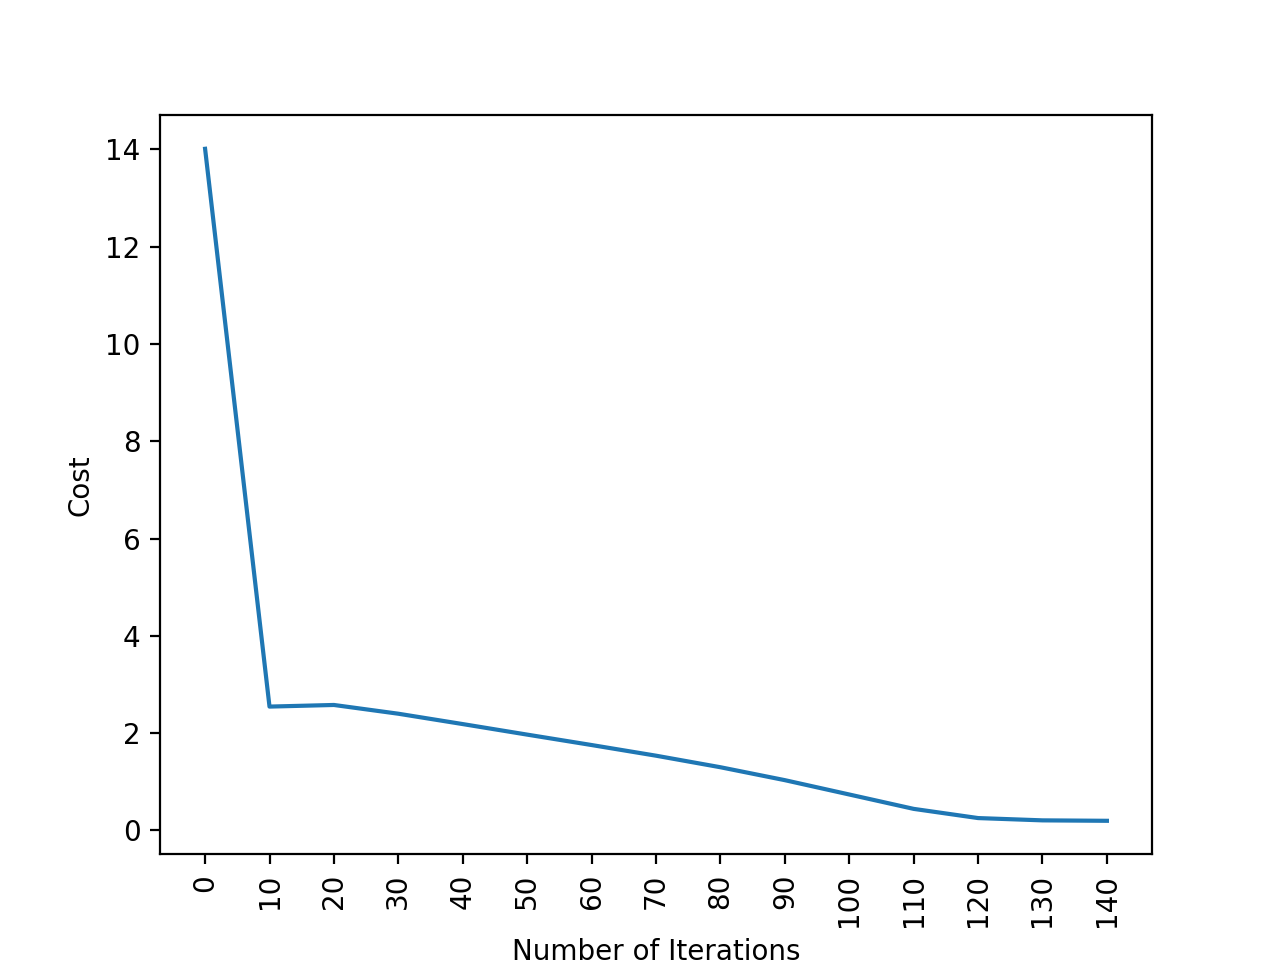

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [17]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_of_iteration=150)

# Logistic Regression From Sklearn

In [18]:
from sklearn import linear_model
Logreg = linear_model.LogisticRegression(random_state = 42, max_iter=150)

In [19]:
x_train.T.shape

(348, 4096)

In [20]:
print('test accuracy: {}'.format(Logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

test accuracy: 0.967741935483871


<IPython.core.display.Javascript object>


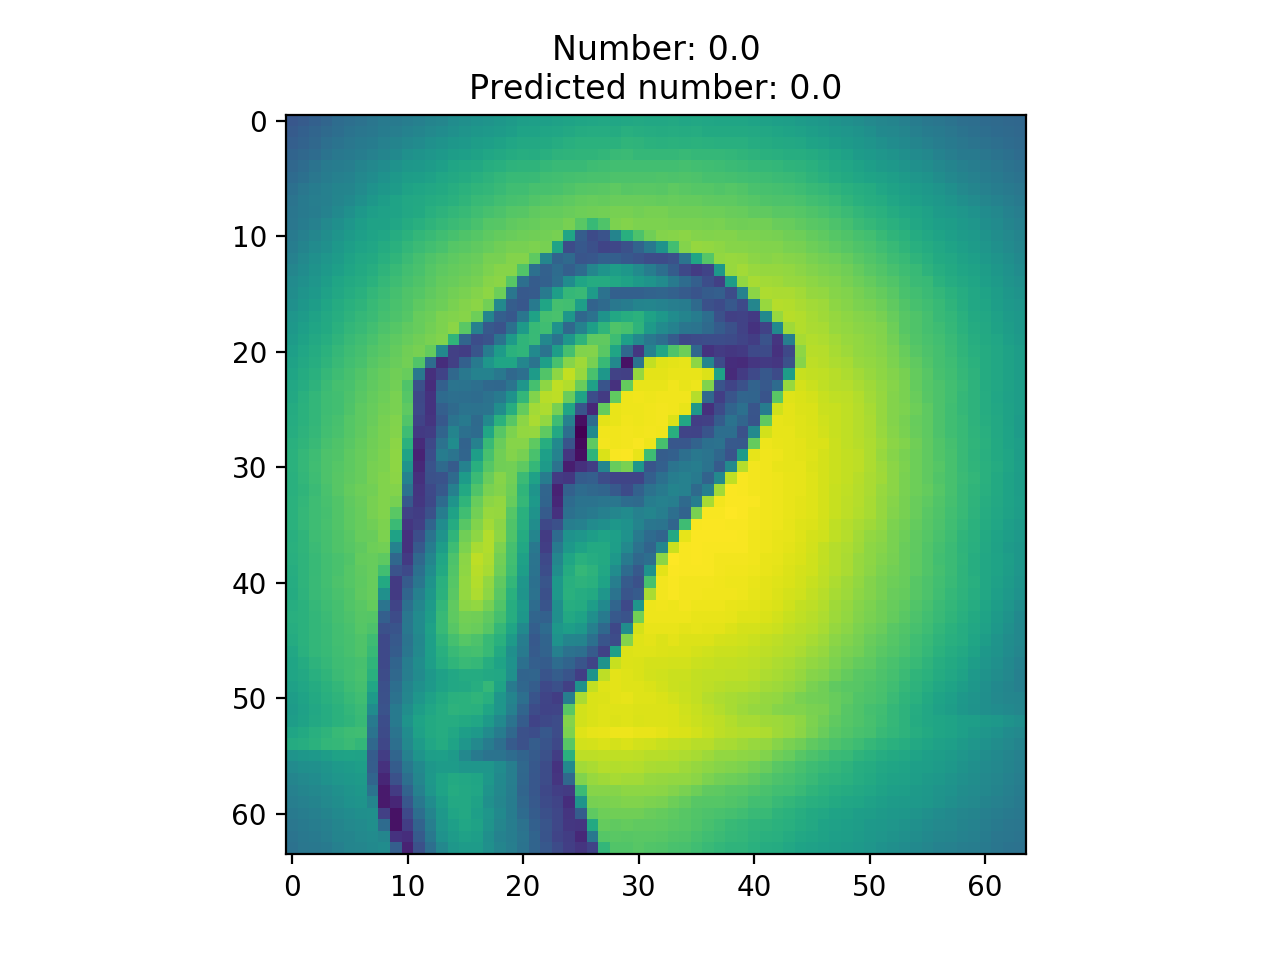

Text(0.5, 1.0, 'Number: 0.0\nPredicted number: 0.0')

In [21]:
%matplotlib notebook
n = 60 # nth sign
plt.imshow(X_test[n].reshape(img_size, img_size))
plt.title('Number: {}'.format(Y_test[n][0]) + '\n' + 'Predicted number: {}'.format(Logreg.predict(x_test.T)[n]))

<IPython.core.display.Javascript object>


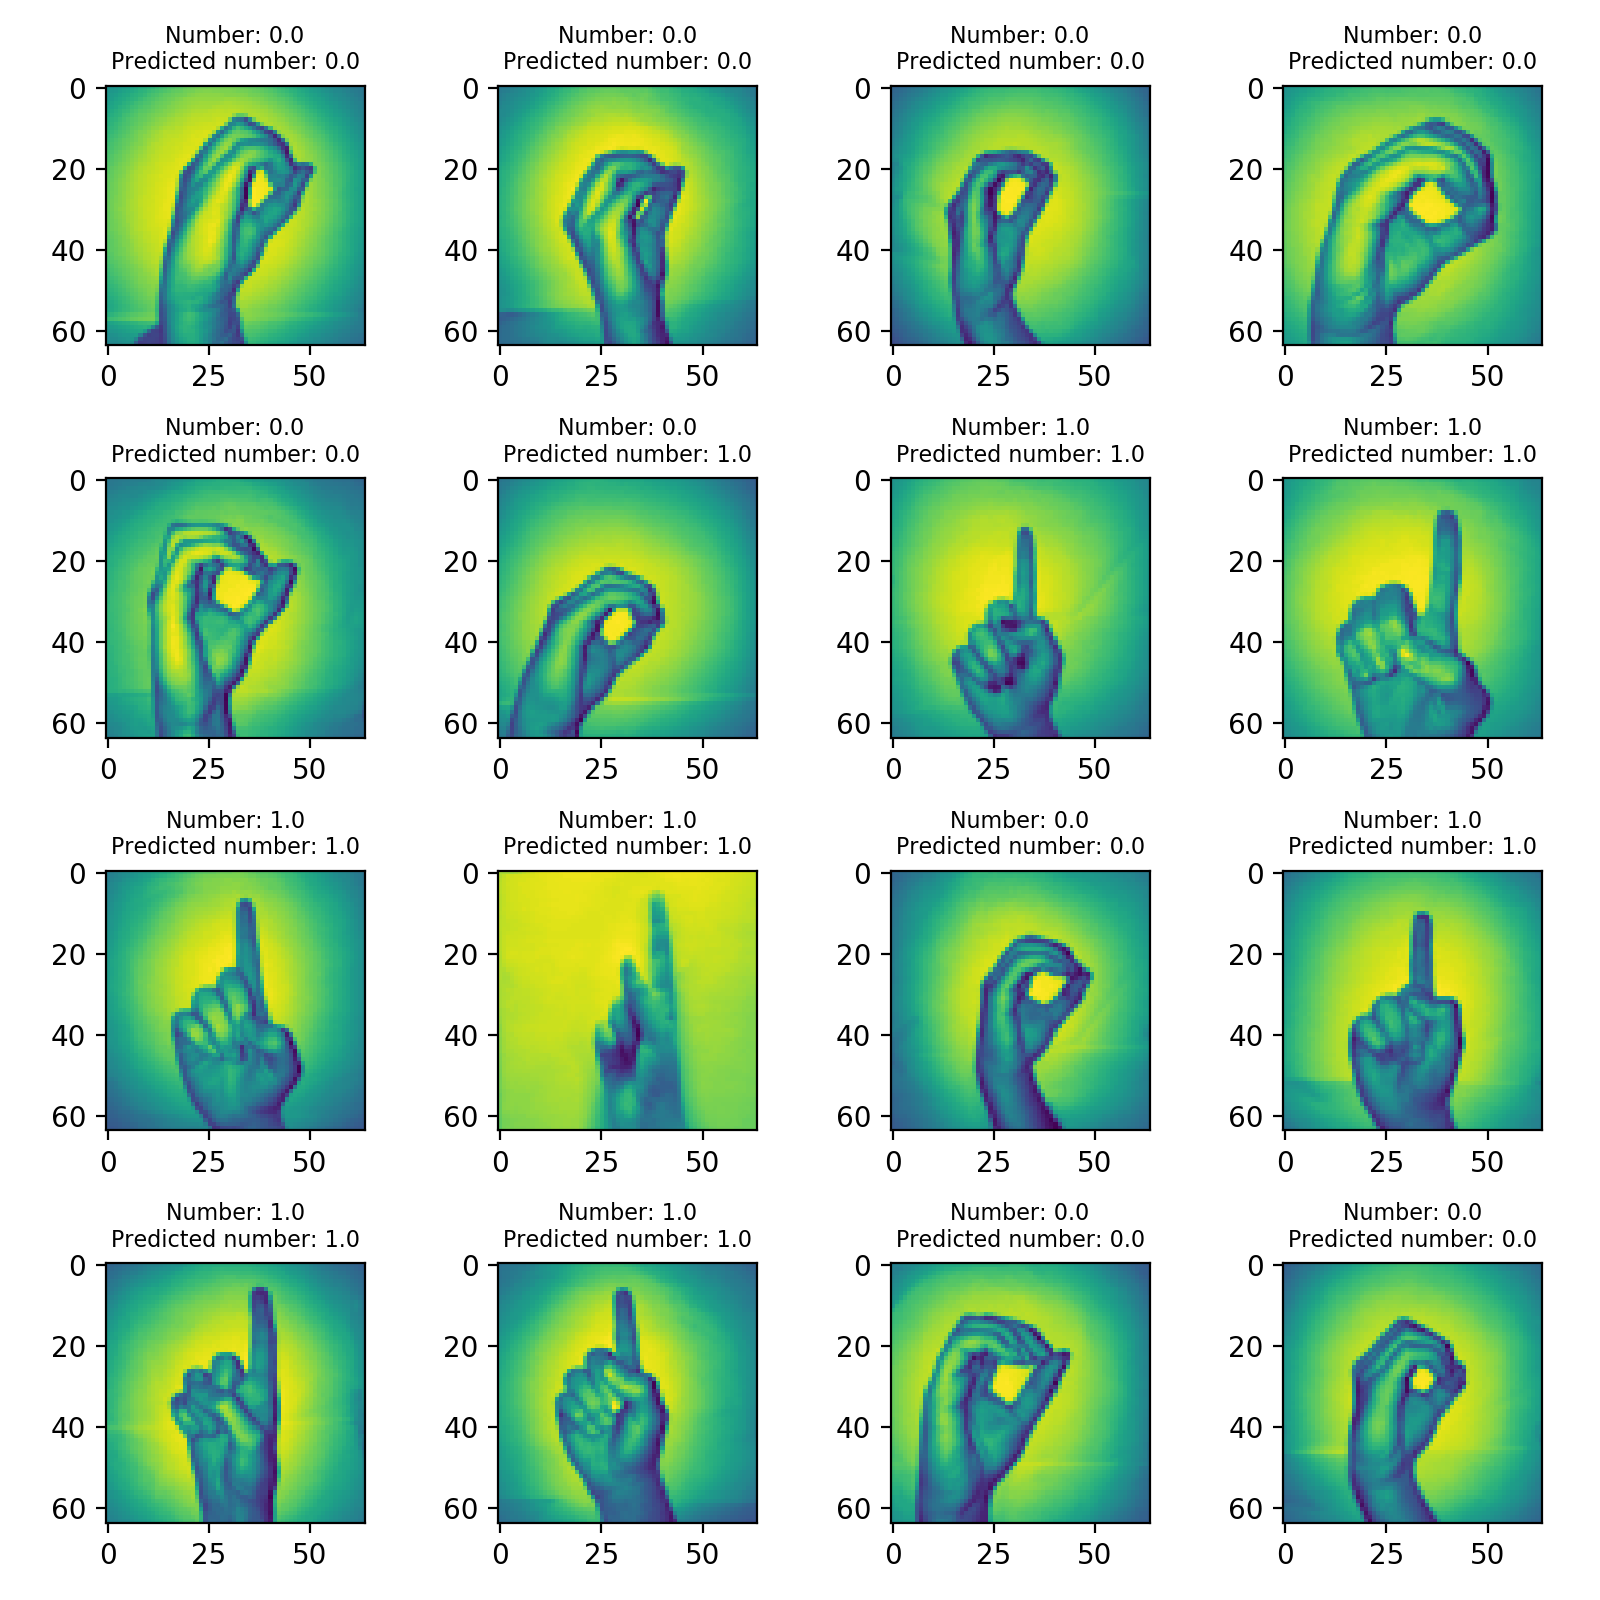

In [22]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i +1)
    plt.imshow(X_test[i].reshape(img_size, img_size))
    plt.title('Number: {}'.format(Y_test[i][0]) + '\n' + 
                        'Predicted number: {}'.format(Logreg.predict(x_test.T)[i]), fontsize = 8)
plt.tight_layout()

# Artificial Neural Network

In [22]:
# Now lets implement a two layer ANN

In [23]:
def initialize_parameters_and_layer_size_NN(x_train, y_train):
    
    parameters = {'weight1': np.random.randn(3, x_train.shape[0]) * 0.1, 
                  'bias1': np.zeros((3,1)), 'weight2': np.random.randn(y_train.shape[0], 3) * 0.1, 
                  'bias2': np.zeros((y_train.shape[0], 1))}
    
    return parameters
    

In [24]:
y_train.shape[0]

1

In [25]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'], A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    
    return A2, cache
    

In [26]:
# Cost function
def compute_cost_NN(A2, Y):
    log_product = np.multiply(np.log(A2), Y)
    cost = -np.sum(log_product)/Y.shape[1]
    
    return cost

In [27]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache['A2'] - Y
    dW2 = np.dot(dZ2, cache['A1'].T)/X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims=True)/X.shape[1]
    
    dZ1 = np.dot(parameters['weight2'].T, dZ2) * (1 - np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims=True)/X.shape[1]
    
    grads = {'dweight1': dW1, 'dbias1': db1, 'dweight2': dW2, 'dbias2': db2}
    
    return grads

In [28]:
def update(parameters, grads, learning_rate = 0.01):
    parameters = {'weight1': parameters['weight1'] - learning_rate * grads['dweight1'],
                 'bias1': parameters['bias1'] - learning_rate * grads['dbias1'],
                 'weight2': parameters['weight2'] - learning_rate * grads['dweight2'],
                 'bias2': parameters['bias2'] - learning_rate * grads['dbias2']}
    
    return parameters

In [29]:
def predict_NN(parameters, x_test):
    
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_predict = np.zeros((1, x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i]<= 0.5:
            Y_predict[0, i] = 0
        else:
            Y_predict[0, i] = 1
            
    return Y_predict

Cost after iteration 0: 0.358468
Cost after iteration 100: 0.349061
Cost after iteration 200: 0.346182
Cost after iteration 300: 0.345227
Cost after iteration 400: 0.344911
Cost after iteration 500: 0.344811
Cost after iteration 600: 0.344783
Cost after iteration 700: 0.344778
Cost after iteration 800: 0.344779
Cost after iteration 900: 0.344782
Cost after iteration 1000: 0.344784
Cost after iteration 1100: 0.344786
Cost after iteration 1200: 0.344787
Cost after iteration 1300: 0.344788
Cost after iteration 1400: 0.344789


<IPython.core.display.Javascript object>


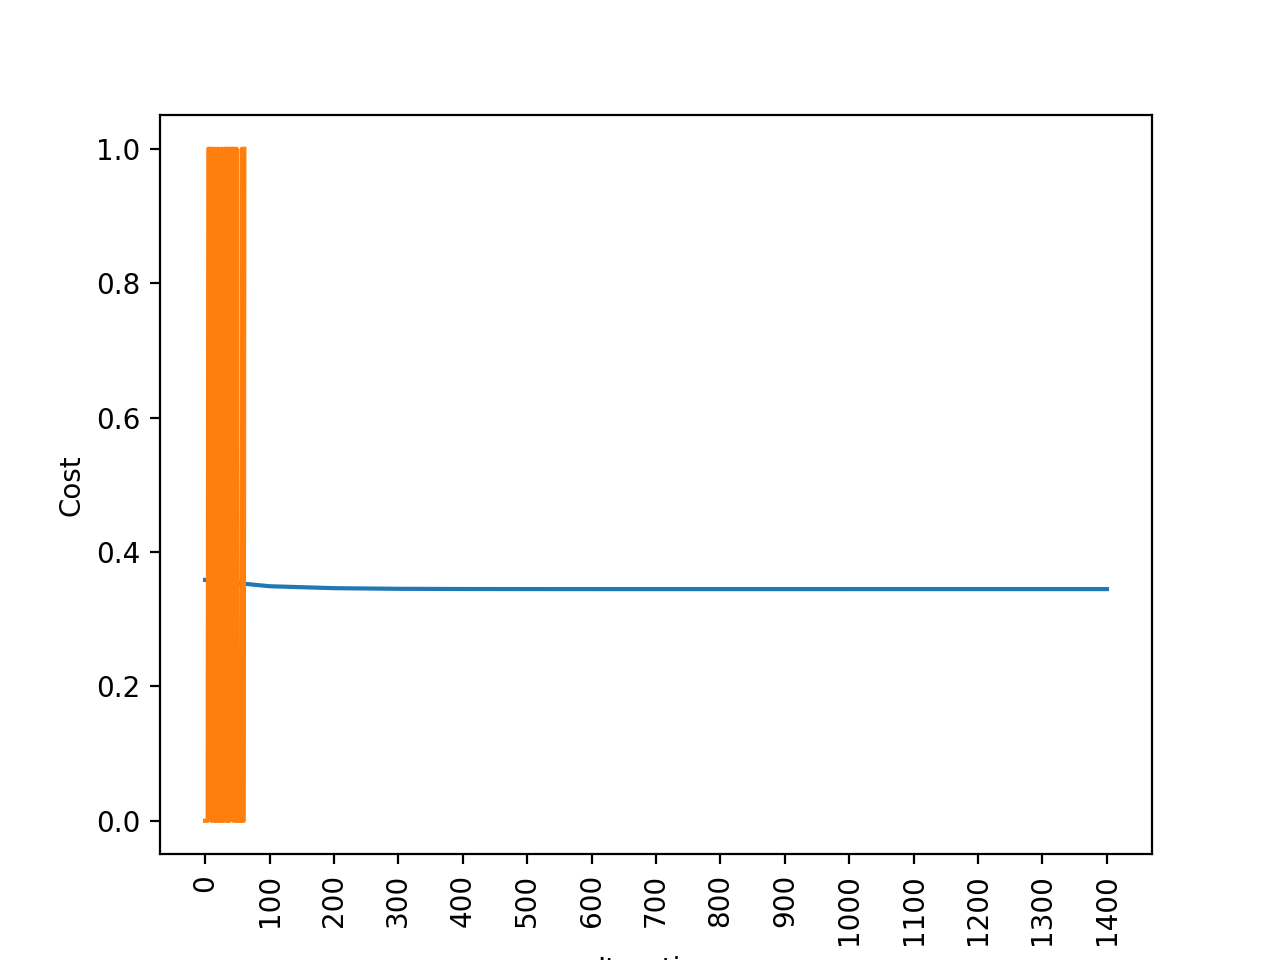

Accuracy for train set: 50.57471264367816 %
Accuracy for test set: 46.7741935483871 %


In [30]:
%matplotlib notebook
def two_layer_NN(x_test, y_test, x_train, y_train, num_iteration):
    
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_size_NN(x_train, y_train)
    
    for i in range(0, num_iteration):
        A2, cache = forward_propagation_NN(x_train, parameters)
        cost = compute_cost_NN(A2, y_train)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update(parameters, grads, learning_rate = 0.01)
        
        if i%100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print('Cost after iteration %i: %f'%(i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = 90)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    
    y_prediction_train = predict_NN(parameters, x_train)
    y_prediction_test = predict_NN(parameters, x_test)
    
    print('Accuracy for train set: {} %'.format(100 - 
                                                np.sum(np.abs(y_prediction_train - y_train))/x_train.shape[1] * 100))
    
    print('Accuracy for test set: {} %'.format(100 - 
                                                np.sum(np.abs(y_prediction_test - y_test))/x_test.shape[1] * 100))
    
    return parameters
    
        
        
        
parameters = two_layer_NN(x_test, y_test, x_train, y_train, num_iteration = 1500)        
        
    

# Implementing with Keras Libraries

In [31]:
#reshape our date
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential 
#from keras.layers import Dense, Flatten 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [33]:
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [34]:
classifier = KerasClassifier(build_fn=build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
accuracy_mean = accuracies.mean()
accuracy_variance = accuracies.std()
print('Accuracy Mean: {}'.format(accuracy_mean))
print('Accuracy STD: {}'.format(accuracy_variance))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
232/232 [==============================]232/232 [==============================] - 0s 851us/step - loss: 7.2840 - acc: 0.5431

Epoch 2/100
232/232 [==============================]232/232 [==============================] - 0s 109us/step - loss: 7.2840 - acc: 0.5431

Epoch 3/100
232/232 [==============================]232/232 [==============================] - 0s 351us/step - loss: 7.2840 - acc: 0.5431

Epoch 4/100
232/232 [==============================]232/232 [==============================] - 0s 127us/step - loss: 7.2840 - acc: 0.5431

Epoch 5/100
232/232 [==============================]232/232 [==============================] - 0s 261us/step - loss: 7.2840 - acc: 0.5431

Epoch 6/100
232/232 [==============================]232/232 [==============================] - 0s 263us/step - loss: 7.2840 - acc: 0.5431

Epoch 7/100
232/232 [==============================]232/232 [==============================] 


Epoch 15/100
232/232 [==============================]232/232 [==============================] - 0s 136us/step - loss: 8.3148 - acc: 0.4784

Epoch 16/100
232/232 [==============================]232/232 [==============================] - 0s 560us/step - loss: 8.3148 - acc: 0.4784

Epoch 17/100
232/232 [==============================]232/232 [==============================] - 0s 391us/step - loss: 8.3148 - acc: 0.4784

Epoch 18/100
232/232 [==============================]232/232 [==============================] - 0s 299us/step - loss: 8.3148 - acc: 0.4784

Epoch 19/100
232/232 [==============================]232/232 [==============================] - 0s 133us/step - loss: 8.3148 - acc: 0.4784

Epoch 20/100
232/232 [==============================]232/232 [==============================] - 0s 166us/step - loss: 8.3148 - acc: 0.4784

Epoch 21/100
232/232 [==============================]232/232 [==============================] - 0s 243us/step - loss: 8.3148 - acc: 0.4784

Epoch 22/100
232/23

232/232 [==============================]232/232 [==============================] - 0s 116us/step - loss: 8.0399 - acc: 0.4957

Epoch 32/100
232/232 [==============================]232/232 [==============================] - 0s 178us/step - loss: 8.0399 - acc: 0.4957

Epoch 33/100
232/232 [==============================]232/232 [==============================] - 0s 143us/step - loss: 8.0399 - acc: 0.4957

Epoch 34/100
232/232 [==============================]232/232 [==============================] - 0s 133us/step - loss: 8.0399 - acc: 0.4957

Epoch 35/100
232/232 [==============================]232/232 [==============================] - 0s 355us/step - loss: 8.0399 - acc: 0.4957

Epoch 36/100
232/232 [==============================]232/232 [==============================] - 0s 226us/step - loss: 8.0399 - acc: 0.4957

Epoch 37/100
232/232 [==============================]232/232 [==============================] - 0s 123us/step - loss: 8.0399 - acc: 0.4957

Epoch 38/100
232/232 [===========

In [35]:
accuracies

array([0.43103448, 0.56034483, 0.52586207])

In [59]:
#As you see using These two import commands:
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten
#the accuracies are very bad

In [45]:
# Now I use these two import commans:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten 
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [46]:
classifier = KerasClassifier(build_fn=build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
accuracy_mean = accuracies.mean()
accuracy_variance = accuracies.std()
print('Accuracy Mean: {}'.format(accuracy_mean))
print('Accuracy STD: {}'.format(accuracy_variance))

Epoch 1/100
232/232 [==============================] - 0s 62us/step - loss: 0.6935 - acc: 0.4569
Epoch 2/100
232/232 [==============================] - 0s 109us/step - loss: 0.6932 - acc: 0.4569
Epoch 3/100
232/232 [==============================] - 0s 319us/step - loss: 0.6930 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 88us/step - loss: 0.6929 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 375us/step - loss: 0.6928 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 63us/step - loss: 0.6926 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 295us/step - loss: 0.6926 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 468us/step - loss: 0.6925 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 101us/step - loss: 0.6924 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 94us/step - loss: 0.6921 - acc: 0.5431
Epoch 11/100
232/232 [=

232/232 [==============================] - 0s 76us/step - loss: 0.6923 - acc: 0.5216
Epoch 66/100
232/232 [==============================] - 0s 88us/step - loss: 0.6923 - acc: 0.5216
Epoch 67/100
232/232 [==============================] - 0s 65us/step - loss: 0.6923 - acc: 0.5216
Epoch 68/100
232/232 [==============================] - 0s 201us/step - loss: 0.6923 - acc: 0.5216
Epoch 69/100
232/232 [==============================] - 0s 212us/step - loss: 0.6923 - acc: 0.5216
Epoch 70/100
232/232 [==============================] - 0s 95us/step - loss: 0.6923 - acc: 0.5216
Epoch 71/100
232/232 [==============================] - 0s 62us/step - loss: 0.6923 - acc: 0.5216
Epoch 72/100
232/232 [==============================] - 0s 126us/step - loss: 0.6923 - acc: 0.5216
Epoch 73/100
232/232 [==============================] - 0s 115us/step - loss: 0.6923 - acc: 0.5216
Epoch 74/100
232/232 [==============================] - 0s 47us/step - loss: 0.6923 - acc: 0.5216
Epoch 75/100
232/232 [=======

In [47]:
accuracies

array([0.43103448, 0.43965517, 0.47413793])

In [48]:
#And you see the accuracies are very good!!

In [55]:
# I tried to implement predict but predict and predict_classes functions did not work
#Let's try in this way:

In [72]:
model = Sequential() # initialize neural network
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
348/348 [==============================] - 0s 47us/step - loss: 0.6930 - acc: 0.5201
Epoch 2/100
348/348 [==============================] - 0s 76us/step - loss: 0.6923 - acc: 0.4943
Epoch 3/100
348/348 [==============================] - 0s 158us/step - loss: 0.6908 - acc: 0.4943
Epoch 4/100
348/348 [==============================] - 0s 110us/step - loss: 0.6884 - acc: 0.6006
Epoch 5/100
348/348 [==============================] - 0s 138us/step - loss: 0.6845 - acc: 0.4943
Epoch 6/100
348/348 [==============================] - 0s 48us/step - loss: 0.6798 - acc: 0.4943
Epoch 7/100
348/348 [==============================] - 0s 118us/step - loss: 0.6694 - acc: 0.5517
Epoch 8/100
348/348 [==============================] - 0s 116us/step - loss: 0.6578 - acc: 0.5287
Epoch 9/100
348/348 [==============================] - 0s 122us/step - loss: 0.6414 - acc: 0.6782
Epoch 10/100
348/348 [==============================] - 0s 85us/step - loss: 0.6240 - acc: 0.5287
Epoch 11/100
348/348 [=

In [73]:
y_prediction = np.zeros((x_test.shape[0], 1)) # or np.zeros(y_test.shape)
prediction = classifier.predict(x_test)
for i in range(classifier.predict(x_test).shape[0]):
    if prediction[i, 0] <= 0.5:
        prediction[i, 0] = 0
    if prediction[i, 0] > 0.5:
        prediction[i, 0] = 1 
        

In [80]:
print('Accuracy on test data')
print(model.evaluate(x_test, y_test)[1])

Accuracy on test data
62/62 [==============================] - 0s 127us/step
0.9516128897666931


In [84]:
(100 - 100 * np.mean(np.abs(y_test - prediction))) 

93.54838709677419

<IPython.core.display.Javascript object>


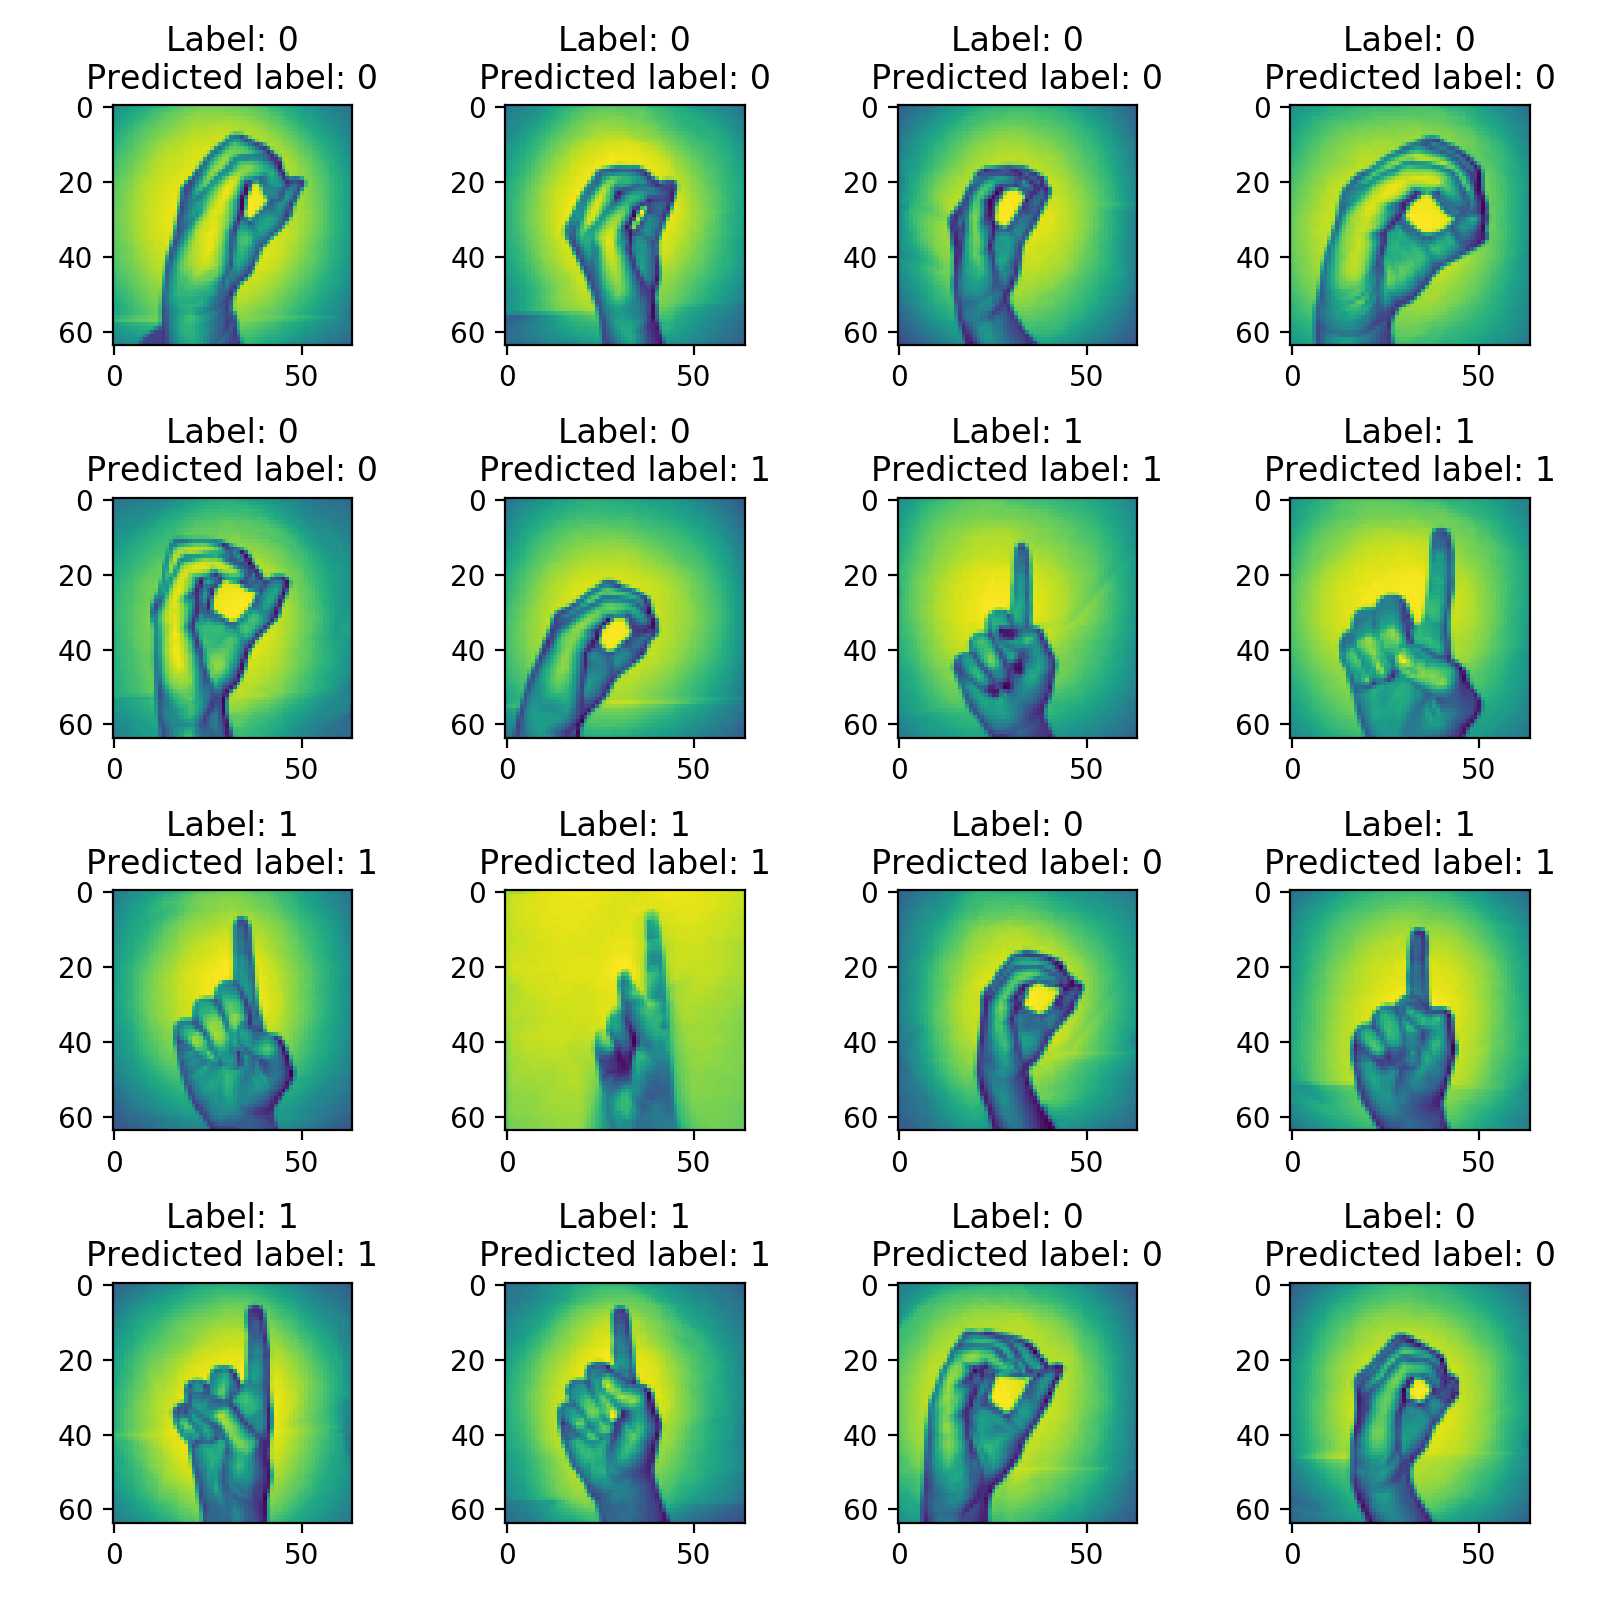

In [90]:
%matplotlib notebook
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].reshape(img_size, img_size))
    plt.title("Label: {}".format(int(y_test[i][0])) + '\n' + 'Predicted label: {}'.format(int(prediction[i][0])))
plt.tight_layout()